In [63]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [14]:
#reading the file
file = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
file.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
file.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
correlation = file.drop(['species'],axis=1).corr()

<AxesSubplot:>

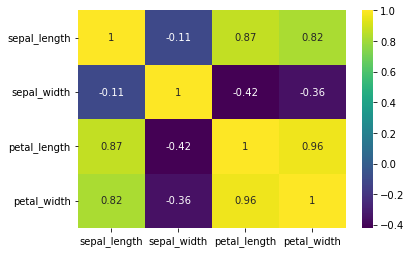

In [26]:
sb.heatmap(correlation,annot=True,cmap="viridis")

In [29]:
Species = ['setosa','versicolor','virginica']
colors = ['red','blue','black']

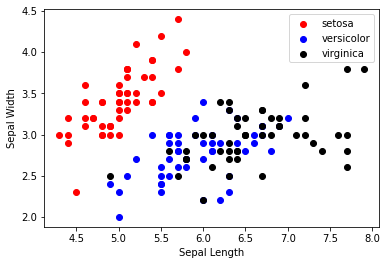

In [30]:
for i in range(3):
    C=file[file['species']==Species[i]]
    plt.scatter(C['sepal_length'],C['sepal_width'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

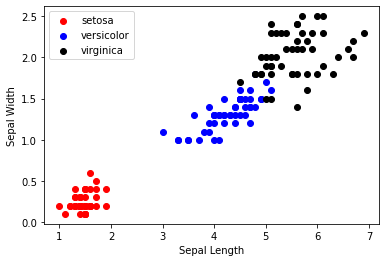

In [31]:
for i in range(3):
    C=file[file['species']==Species[i]]
    plt.scatter(C['petal_length'],C['petal_width'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [34]:
#feature and target selection
X = file.drop(['species'],axis=1)
Y = file['species']

In [42]:
LB = LabelEncoder()
Y = LB.fit_transform(Y)

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [52]:
LRmodel = LinearRegression()

# Training the model
LRmodel.fit(X_train,Y_train)

# Make predictions on the test set
Y_pred = LRmodel.predict(X_test)

In [57]:
LRscore = r2_score(Y_test,Y_pred)*100
print('Accuracy : {:0.2f}%'.format(LRscore))
LRmsr = mean_squared_error(Y_test, Y_pred, squared=False)
print("Mean Squared Error = {:0.2f}\n".format(LRmsr))

Accuracy : 88.46%
Mean Squared Error = 0.25



In [61]:
DTRmodel = DecisionTreeClassifier()

# Training the model
DTRmodel.fit(X_train,Y_train)

# Make predictions on the test set
DTR_pred = DTRmodel.predict(X_test)

In [62]:
DTRscore = r2_score(Y_test,DTR_pred)*100
print('Accuracy : {:0.2f}%'.format(DTRscore))
DTRmsr = mean_squared_error(Y_test, DTR_pred, squared=False)
print("Mean Squared Error = {:0.2f}\n".format(DTRmsr))

Accuracy : 93.81%
Mean Squared Error = 0.18



In [64]:
#Building other models
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(X_train, Y_train)
RFR_pred = RFR.predict(X_test)

In [65]:
RFRscore = r2_score(Y_test,RFR_pred)*100
print('Accuracy : {:0.2f}%'.format(RFRscore))
RFRmsr = mean_squared_error(Y_test, RFR_pred, squared=False)
print("Mean Squared Error = {:0.2f}\n".format(RFRmsr))

Accuracy : 93.81%
Mean Squared Error = 0.18



In [66]:
score=pd.DataFrame({
    "Accuracy": [LRscore,RFRscore,DTRscore],
    "Mean Sqaure Error": [LRmsr,RFRmsr,DTRmsr]},
    index=['LinearRegression','RandomForestClassifier','DecisionTreeRegressor']
)
score.sort_values(by='Accuracy',ascending=False)

,Accuracy,Mean Sqaure Error
DecisionTreeRegressor,93.814433,0.182574
RandomForestClassifier,93.808247,0.182665
LinearRegression,88.455784,0.249420
